# Métricas de evaluación para clasificación

Cuando trabajamos en clasificación, la forma más habitual de determinar su rendimiento es mediante la denominada **matriz de confusión**. La matriz de confusión es una tabla de contingencia que cuentas las frecuencias de los real frente a lo predicho. 

Suponiendo que trabajamos con un problema de clasificación binario, la matriz de confusión tendrá la siguiente forma:

|                        | Real (clase 0) | Real (clase 1) |
| ---------------------- | -------------- | -------------- |
| **Predicho (clase 0)** | A              | B              | 
| **Predicho (clase 1)** | C              | D              |

A partir de esta matriz, es posible extrapolar diferentes medidas de calidad.

$$
accuracy = \frac{A+D}{A+B+C+D}
$$

$$
precision_0 = \frac{A}{A+B}
$$

$$
precision_1 = \frac{D}{C+D}
$$

$$
recall_0 = \frac{A}{A+C}
$$

$$
recall_1 = \frac{D}{B+D}
$$

De forma textual:

- El *accuracy* mide la capacidad predictora del clasificador
- La *precision_c* y el *recall_c* miden el rendimiento predictivo del clasificador de la clase *c*

Además, puesto que *precision* y *recall* suelen medir objetivos contrapuestos, es común unificarlos en la medida *F1*:

$$
F1_c = \frac{precision_c \cdot recall_c}{precision_c + recall_c}
$$

Como mostrar la *precision*, el *recall* y el *F1* de cada clase de forma independiente no permite tener una visión global de lo bueno que resulta un clasificador, es habitual promediar los resultados. Para ello, podemos seguir diferentes enfoques:

- `macro`: promedia los resultados de las medidas de calidad dando el **mismo peso** a todas las clases
- `weighted`: promedia los resultados de las medidas de calidad asignando un **peso diferente** a cada clase en función del número de muestras de esta

Todas estas medidas de calidad se encuentran definidas dentro de [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) con los métodos [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) y [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

Aunque en el ejemplo anterior hemos supuesto medir el rendimiento de un clasificador binario, todas estas medidas son extrapolables a cualquier clasificador multiclase.

Analicemos su funcionamiento mediante un ejemplo. Vamos a medir el rendimiento de la regresión logística para el conjunto de datos [*iris dataset*](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

Cargamos el conjunto de datos:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

Mostramos su información:

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Dividimos el conjunto de datos en entrenamiento y test como ya vimos para evaluar la regresión:

In [3]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Entrenamos el clasificador:

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pintamos la matriz de confusión de las predicciones de test mediante [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix):

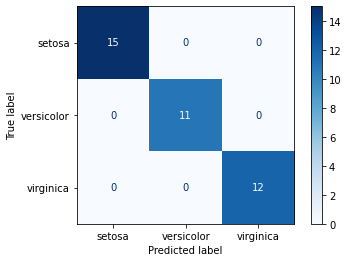

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues)

plt.show()  

E imprimimos el [*classification report*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html):

In [6]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Curva ROC

Otra forma habitual de medir el rendimiento de un clasificador **binario** es empleando el **Área bajo la curva ROC (AUC)**. Esta curva esta pensada para medir el rendimiento de sistemas en los que tenemos una clase positiva (clase 1) y una neutra (clase 0). Es muy usando en contextos como la medicina en el cual queremos predecir si un paciente tiene una determinada enfermedad (clase 1) o no la tiene (clase 0). La curva mira la relación entre la ratio de verdaderos positivos (TPR), es decir, pacientes que se predijo que tenían la enfermedad y realmente la tenían, frente al ratio de falsos positivos (FPR), es decir, pacientes que se predijo que tenían la enfermedad, pero no la tenían.

La curva ROC se construye analizando la salida de un clasificador mediante el filtrado de las predicciones inferiores a un umbral que se va variando. Dicho de otro modo, la curva de calcula uniendo los puntos generados por el TPR y FPR para todas las predicciones que tengan un `predict_proba()` o `decision_fuction()` igual o superior a un valor que variamos. Por ejemplo, si la salida del modelo es probabilística (el clasificador dispone del método `predict_proba()`) se evaluaran las predicciones con probabilidad igual o superior a `1.0`, `0.9`, ..., `0.0`. 

Veamos un ejemplo de curva ROC para el conjunto de datos de [*breast_cancer*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Cargamos el conjunto de datos:

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Imprimimos su descripción:

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Partimos en entrenamiento y test:

In [9]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Entrenamos un clasificador, por ejemplo, `LinearSVC`:

In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42).fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Y pintamos la curva:

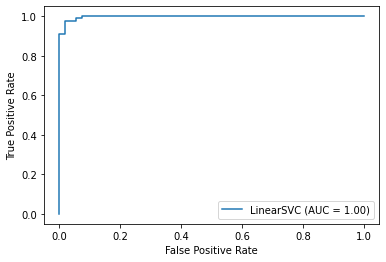

In [11]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)

Idealmente deseamos un alto ratio de verdaderos positivos y un bajo ratio de falsos negativos por lo que la curva ideal será la que más se aproxime a la esquina superior izquierda del gráfico. Por ello, en lugar de representar un gráfico, se mide el **Área bajo de curva ROC (AUC)** para comparar diferentes clasificadores.

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">